## Getting requirements

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
data = []
labels = []
classes = 43
cur_path = os.getcwd()

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
            
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

## exploring dataset

In [11]:
X_train , X_test ,Y_train , Y_test = train_test_split(data , labels , test_size = 0.2 , random_state = 42)
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3)
(31367,) (7842,)


# Building the Model

## The architecture of our model is:

    2 Conv2D layer (filter=32, kernel_size=(5,5), activation=”relu”)
    MaxPool2D layer ( pool_size=(2,2))
    Dropout layer (rate=0.25)
    2 Conv2D layer (filter=64, kernel_size=(3,3), activation=”relu”)
    MaxPool2D layer ( pool_size=(2,2))
    Dropout layer (rate=0.25)
    Flatten layer to squeeze the layers into 1 dimension
    Dense Fully connected layer (256 nodes, activation=”relu”)
    Dropout layer (rate=0.5)
    Dense layer (43 nodes, activation=”softmax”)

In [15]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [16]:
epochs = 15
history = model.fit(X_train , Y_train , batch_size=32 , epochs = epochs , validation_data =(X_test , Y_test))

Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 62s 2ms/sample - loss: 2.3024 - accuracy: 0.3954 - val_loss: 0.7279 - val_accuracy: 0.8115
Epoch 2/15
31367/31367 [==============================] - 57s 2ms/sample - loss: 0.8533 - accuracy: 0.7475 - val_loss: 0.3801 - val_accuracy: 0.8907
Epoch 3/15
31367/31367 [==============================] - 57s 2ms/sample - loss: 0.5580 - accuracy: 0.8350 - val_loss: 0.2692 - val_accuracy: 0.9280
Epoch 4/15
31367/31367 [==============================] - 58s 2ms/sample - loss: 0.4400 - accuracy: 0.8692 - val_loss: 0.1662 - val_accuracy: 0.9528
Epoch 5/15
31367/31367 [==============================] - 57s 2ms/sample - loss: 0.3797 - accuracy: 0.8879 - val_loss: 0.1504 - val_accuracy: 0.9593
Epoch 6/15
31367/31367 [==============================] - 58s 2ms/sample - loss: 0.3379 - accuracy: 0.9011 - val_loss: 0.1111 - val_accuracy: 0.9676
Epoch 7/15
31367/31367 [==============================] -

In [20]:
model.save("my_model.h5")

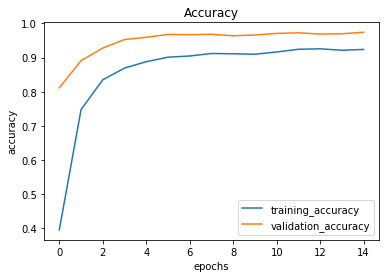

In [18]:
plt.figure(0)
plt.plot(history.history['accuracy'] , label = 'training_accuracy')
plt.plot(history.history['val_accuracy'] , label = 'validation_accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

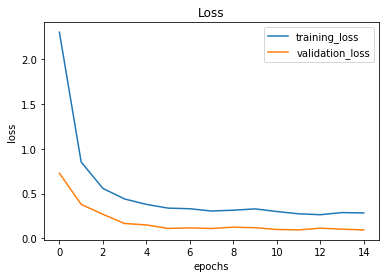

In [19]:
plt.figure(1)
plt.plot(history.history['loss'] , label = 'training_loss')
plt.plot(history.history['val_loss'] , label = 'validation_loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data ,dtype = float)


pred = model.predict_classes(X_test)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

model.save("traffic_classifier.h5")

0.9447347585114806
